In [1]:
import numpy as np
import random
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *
import networkx as nx
from utils import *
import time
import csv

In [2]:
# constants
c = 2e5 # speed of light in fiber [km/s]
p_link = 1.0 # photon insertion loss incorporates various efficiencies of the experimental hardware
F_link = 1 # fidelity of local BP
mu_link = 1 # depolarizing noise channel parameter (1: no noise, 0: fully depolarized)


In [9]:
τ_coh = 0.1
τ_cut = 0.05
F_link = 1 # fidelity of local BP
mu_link = 1 # depolarizing noise channel parameter (1: no noise, 0: fully depolarized)
Le2e = 200
δ = 0.001
rep_loc = np.linspace(δ,1-δ,60)
ebit_rate_par = np.zeros(len(rep_loc))
skr_par = np.zeros(len(rep_loc))
Fe2e_par = np.zeros(len(rep_loc))
ebit_rate_seq = np.zeros(len(rep_loc))
skr_seq = np.zeros(len(rep_loc))
Fe2e_seq = np.zeros(len(rep_loc))
ebit_rate_DT = np.zeros(len(rep_loc))
each_scheme_cutoff_result  ={}
for i, pos in enumerate(rep_loc):
    L1 = pos*Le2e
    L2 = Le2e - L1
    print("point %s is done from %s "%(i,len(rep_loc)),end="\r")
    ebit_rate_par[i], skr_par[i], Fe2e_par[i] =  one_repeater_parallel_cutoff(L1,L2,τ_cut,τ_coh, mu_link, F_link,10e7)
    ebit_rate_seq[i], skr_seq[i], Fe2e_seq[i] =  one_repeater_sequential_cutoff(L1,L2,τ_cut,τ_coh, mu_link, F_link)
    p =10**(-0.2*Le2e/10) 
    T  = Le2e/2e5
    PLOT = p/(2*T)
    ebit_rate_DT[i] = PLOT

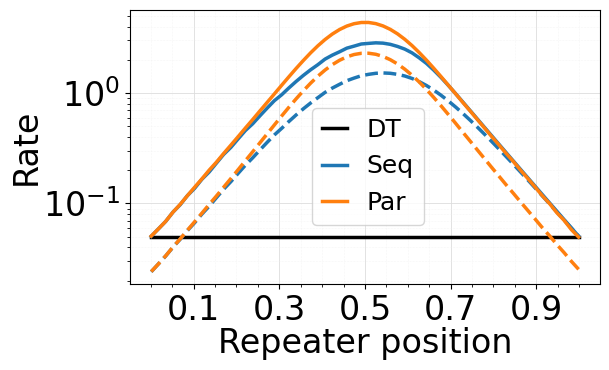

In [18]:
font_size = 44
image_width = 6.2
image_lenght = 3.8
legend_flag  =True
legends_on_the_right_flag = False
legend_font_size = 18
fig = plt.figure()

    
fig.set_size_inches(image_width, image_lenght, forward=True) 

label_size = 40
csfont = {'fontname':'Times New Roman'}
plt.rcParams['xtick.labelsize'] = 24 
plt.rcParams['ytick.labelsize']= 24
plt.xlabel("Repeater position", fontsize=24,labelpad=0)
plt.ylabel("Rate",fontsize=24,labelpad=0)
plt.grid(True)
plt.tight_layout()

xticks_points = [0.1,0.3,0.5,0.7,0.9]

legend_labels = ["DT","Seq, ebit rate","Seq, SKR","Par, ebit rate","Par, SKR"]
legend_labels = ["DT","Seq","","Par",""]
plt.plot(rep_loc,ebit_rate_DT,"-",linewidth=2.5,color="black",label = "DT")

plt.plot(rep_loc,ebit_rate_seq,"-",linewidth=2.5,color=f"C{0}",label = "Seq")

plt.plot(rep_loc,skr_seq,linestyle='dashed',linewidth=2.5,color=f"C{0}")

plt.plot(rep_loc,ebit_rate_par,"-",linewidth=2.5,color=f"C{1}",label = "Par")

plt.plot(rep_loc,skr_par,linestyle='dashed',linewidth=2.5,color=f"C{1}")
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize']= 24
plt.yscale('log')
plt.legend()
ax = plt.subplot(111)
ax.set_xticks(xticks_points)
# plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
# plt.minorticks_on()
plt.legend(fontsize=legend_font_size,handlelength=1.0,bbox_to_anchor=(0.36, 0.43))
# if legend_flag:
#     plt.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size, ncol=1,handleheight=2.4, labelspacing=0.02)
# if legends_on_the_right_flag:
#     ax = plt.subplot(111)
#     ax.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size,loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(which='major', color='#DDDDDD', linewidth=0.6)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.4)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.tight_layout()
plt.savefig("../plotting/plots/figure2.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


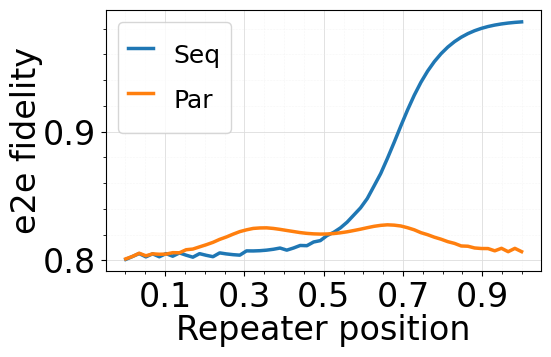

In [11]:
font_size = 44
image_width = 6.2
image_lenght = 3.8
fig = plt.figure()
fig.set_size_inches(image_width, image_lenght, forward=True) 
label_size = 40
csfont = {'fontname':'Times New Roman'}
plt.rcParams['xtick.labelsize'] = 24 
plt.rcParams['ytick.labelsize']= 24
plt.xlabel("Repeater position", fontsize=24,labelpad=0)
plt.ylabel("e2e fidelity",fontsize=24,labelpad=0)
plt.grid(True)
plt.tight_layout()

xticks_points = [0.1,0.3,0.5,0.7,0.9]


plt.plot(rep_loc,Fe2e_seq,"-",color=f"C{0}",linewidth=2.5,)

plt.plot(rep_loc,Fe2e_par,"-",color=f"C{1}",linewidth=2.5,)

legend_labels = ["Seq","Par"]

# plt.yscale('log')
plt.legend()
ax = plt.subplot(111)
ax.set_xticks(xticks_points)
if legend_flag:
    plt.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size, ncol=1,handleheight=2.4, labelspacing=0.02)
# if legends_on_the_right_flag:
#     ax = plt.subplot(111)
#     ax.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size,loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid(which='major', color='#DDDDDD', linewidth=0.6)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.4)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.savefig("../plotting/plots/figure2_fidelity.pdf")